In [17]:
from transformers import pipeline
from utils import scale_image
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

### Image segmentation

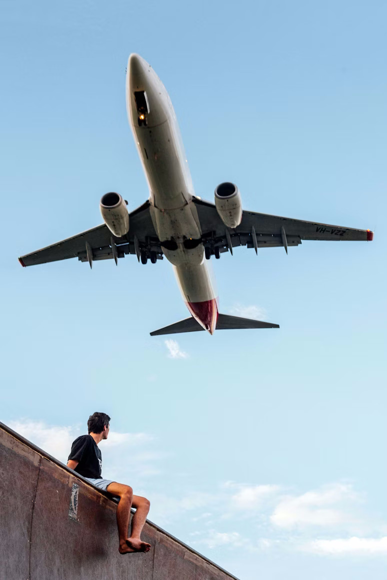

In [3]:
image = Image.open('./data/image-002.jpg')
display(scale_image(image, 0.5))

In [4]:
img_segmenter = pipeline(
    'image-segmentation',
    model='nvidia/segformer-b0-finetuned-ade-512-512'
)

print(img_segmenter.model.config.id2label)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/home/andrei/.virtualenvs/ai.ml/lib/python3.11/site-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)
Device set to use cuda:0


{0: 'wall', 1: 'building', 2: 'sky', 3: 'floor', 4: 'tree', 5: 'ceiling', 6: 'road', 7: 'bed ', 8: 'windowpane', 9: 'grass', 10: 'cabinet', 11: 'sidewalk', 12: 'person', 13: 'earth', 14: 'door', 15: 'table', 16: 'mountain', 17: 'plant', 18: 'curtain', 19: 'chair', 20: 'car', 21: 'water', 22: 'painting', 23: 'sofa', 24: 'shelf', 25: 'house', 26: 'sea', 27: 'mirror', 28: 'rug', 29: 'field', 30: 'armchair', 31: 'seat', 32: 'fence', 33: 'desk', 34: 'rock', 35: 'wardrobe', 36: 'lamp', 37: 'bathtub', 38: 'railing', 39: 'cushion', 40: 'base', 41: 'box', 42: 'column', 43: 'signboard', 44: 'chest of drawers', 45: 'counter', 46: 'sand', 47: 'sink', 48: 'skyscraper', 49: 'fireplace', 50: 'refrigerator', 51: 'grandstand', 52: 'path', 53: 'stairs', 54: 'runway', 55: 'case', 56: 'pool table', 57: 'pillow', 58: 'screen door', 59: 'stairway', 60: 'river', 61: 'bridge', 62: 'bookcase', 63: 'blind', 64: 'coffee table', 65: 'toilet', 66: 'flower', 67: 'book', 68: 'hill', 69: 'bench', 70: 'countertop', 71

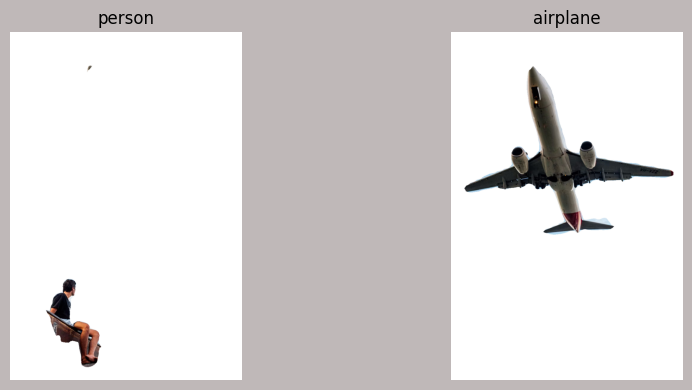

In [24]:
objects_of_interest = ('airplane', 'person')

results = img_segmenter(image)

def extract_object(result):
    base_image = image.copy()
    label = result['label']
    mask_image = result['mask']

    # invert the mask
    mask_image = ImageOps.invert(mask_image)

    # apply the mask over the original image
    base_image.paste(mask_image, mask=mask_image)

    return (label, base_image)

def show_objects(panels, height=4):
    n = len(panels)
    fig_size = (n * (height * 4/3), height)

    (fig, axes) = plt.subplots(1, n, figsize=fig_size)
    fig.patch.set_facecolor("#bfb8b8")

    if n == 1:
        axes = [axes]

    for ax, (label, img) in zip(axes, panels):
        ax.imshow(np.array(img))
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


extracted_objects = [extract_object(result) 
           for result in results 
           if result['label'] in objects_of_interest]

show_objects(extracted_objects)